# PCA through Singular Value Decomposition

In [12]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
cov_matrix = np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(cov_matrix)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi1=np.matmul(np.transpose(X),u1)
Xi2=np.matmul(np.transpose(X),u2)

#print(Xi1[:,None]) # add second dimention to array and test it
X_approx=np.matmul(u1[:,None],Xi1[None,:])+ np.matmul(u2[:,None],Xi2[None,:])
print(X_approx)


# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[[2. 1. 0.]
 [4. 3. 0.]]


# PCA on Iris data

In [13]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

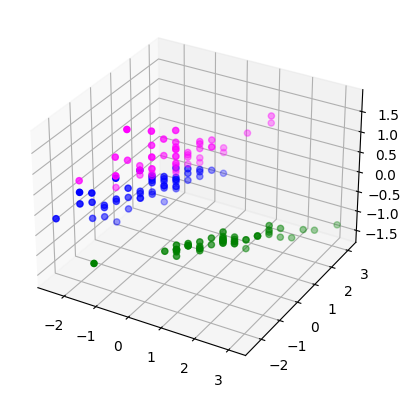

In [21]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
Xscaler=StandardScaler()
Xpp=Xscaler.fit_transform(X)
axes1=plt.axes(projection='3d')
axes1.scatter3D(Xpp[y==0,1],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes1.scatter3D(Xpp[y==1,1],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes1.scatter3D(Xpp[y==2,1],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

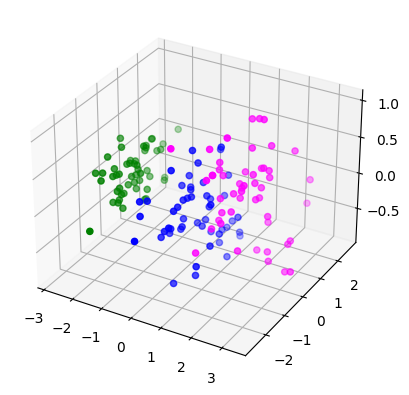

In [15]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

from sklearn import decomposition
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [22]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [23]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

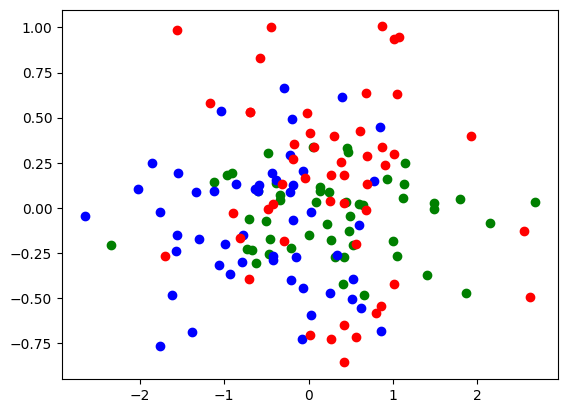

In [25]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,1],Xpca[y==0,2],color='green')
plt.scatter(Xpca[y==1,1],Xpca[y==1,2],color='blue')
plt.scatter(Xpca[y==2,1],Xpca[y==2,2],color='red')

# KNN classifier

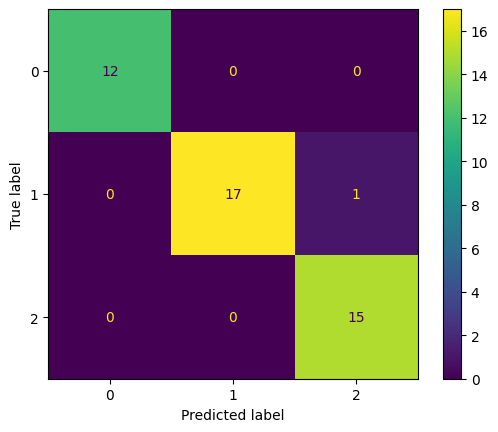

In [27]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
Xpp_train,Xpp_test,ypp_train,ypp_test= train_test_split(Xpp,y,test_size=0.4)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(Xpp_train,ypp_train)
Ypred=knn1.predict(Xpp_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(ypp_test,Ypred)
ConfusionMatrixDisplay.from_predictions(ypp_test,Ypred)



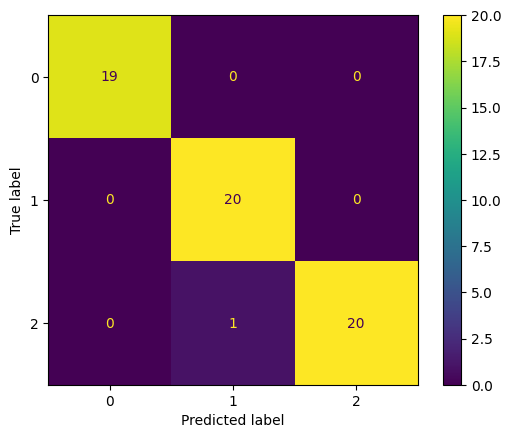

In [28]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
#Xpca
Xpca_train,Xpca_test,ypca_train,ypca_test= train_test_split(Xpca,y,test_size=0.4)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(Xpca_train,ypca_train)
Ypcapred=knn2.predict(Xpca_test)

confusion_matrix(ypca_test,Ypcapred)
ConfusionMatrixDisplay.from_predictions(ypca_test,Ypcapred)



# Compare the results with full dataset



In [ ]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

Xpca_train,Xpca_test,ypca_train,ypca_test= train_test_split(Xpp[:,0:4],y,test_size=0.4)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(Xpca_train,ypca_train)
Ypcapred=knn2.predict(Xpca_test)

confusion_matrix(ypca_test,Ypcapred)
ConfusionMatrixDisplay.from_predictions(ypca_test,Ypcapred)


#Xpca with X reduced to first columns
